<a href="https://colab.research.google.com/github/HarshESC/Experimental-Design-Capstone/blob/main/IBM_HR_Analytics_Employee_Attrition_Proposal_by_Harsh_Parikh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IBM Employee Attrition Dataset Link:  
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

## 1. Introduction.

IBM is an American, multinational technology company headquartered in Armonk, New York, operates globally in over 170 different countries, with its original and largest presence in the US. 

This dataset describes the employee attritions rates, which is the number of workers who leave the organization at IBM using a variety of different factors.  The dataset is quite interesting in how it describes employees job satisfaction in level with various factors, including promotion, salaries, and other similar factors.  

Today, I would focus on how an employee's daily rate can impact job satisfaction at IBM.  The job satisfaction ranges from 1 to 4, with 1 being low jobsatisfaction while 4 is high job satisfaction.  I would like analyze how employees having higher daily rates can lead to a greater frequency of job satisfaction at IBM.

## Audience.

I believe this information would be useful to HR.
Leveraging this data with HR data analytics can help inform and improve almost every area of HR, including recruitment, training, development, performance, and compensation. By using this data, HR managers can make smarter decisions and help an organization meet its goals more efficiently.



## 2. Hypothesis.

Ho: There is no significance between an employee's daily rate and job satisfaction.

Ha:  There is significance between an employee's daily rate at IBM and the job satisfaction they have.  In this case, an employee's daily rates is postively correlated with job satisfaction.  


## 3. Data 

The data comes from [Kaggle](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) 

and contains 1,470 observations and 35 variables. There are no missing values.

Out of these observations, a job satisfaction rating of the follow yields these results.  Right is the number of entries, while the left side is the Job Satisfaction rating.  

JobSatisfaction       Count of Daily Rate Entries     
1                     289
2                     280
3                     442
4                     459

This experiment will explore the satisfaction levels of employees based on their appropriate matching Daily Rates.

The Job Satisfaction variable ranges from 1 to 4, with 1 being low satisfaction, 2 being medium, 3 being high satisfaction, and 4 being very high.  


## 4. Methods

For this analysis I will create four DataFrames, one for each Job Satisfaction category ranging from 1-4.  I feel the best approach is to analyze these four  separately because this will allow for a more interepretable and more stable result with a larger sample size and large grups.  

If the distributions of job satisfaction appear to be close to normally distributed based on their histogram, skewness and kurtosis, I wil conduct an independent samples t-test between the groups at the two-tail, 95% confidence interval. 

Due to there being more than two variables we are analyzing, we will be performing a 

## 5. Results

Based on a visual inspection, Job Satisfaction Levels are close enough to normally distributed that I proceeded with the t-test. Based on a p-values > 0.05,  I reject the null that there is no significant difference in means. 

It seems that more employees with higher Daily Rates account for higher job satisfaction, if you look at the Satisfaction 2 Chart to the Satisfaction 3 Chart.

The 95% confidence interval suggests that there difference in the Daily Rates between the employees with high job satisfaction and employees with lower job satisfaction.  The biggest change being from Job Satisfaction 2 to 3, where the median amount of daily rate increased by 100.  At around 800 Daily Rate, is where more people seem to have a higher satisfaction rating.  

## 6. Discussion and recommendation

Daily Rates are on average higher for employees with Job Satisfactions of 3 or 4 and vice versa.  

This does indicate that lower Daily Rates lead to low job satisfaction, and higher Attrition Rates.  There are quite a number of other factors that could influence the Attrition rates, including job environment, job roles, gender and performance ratings.  

As a next step in the process, let's examine whether certain job roles can influence the amount of satisfaction.  We can allocate those to the amount of pay they receive, and once again analyze how the job role has an influence on the satisfaction levels.  We can analyze possibly through pie charts and histograms.

Another consideration could be considering a gender variation (M/F) to see how these can affect satisfaction. 

All of this would be followed up with another A/B Testing of the results, and separating the job roles so we have a clear intepretation of what areas at IBM have these ratings.  

While the current data definetely indicates how much pay affects attrition, I think the followup of Job roles can help us clearly distinguish what areas need improvement.  This makes for a non-risky, clear, inexpensive way to follow up the finding of the research.  


In [14]:
from google.colab import drive 
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
import os 


In [16]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Capstone 1"



In [17]:
#changing the working directory 
%cd /content/gdrive/My Drive/Capstone 1



/content/gdrive/My Drive/Capstone 1


In [18]:
!ls 

'Copy of Gurney · SlidesCarnival.gslides'
'IBM HR Analytics Employee Attrition Proposal by Harsh Parikh.ipynb'
 kaggle.json
 WA_Fn-UseC_-HR-Employee-Attrition2.csv
 WA_Fn-UseC_-HR-Employee-Attrition.csv


In [19]:
import pandas as pd
attritionDF = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
attritionDF.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [20]:
print(attritionDF[['DailyRate']].groupby(attritionDF['JobSatisfaction']).agg(['count']))


                DailyRate
                    count
JobSatisfaction          
1                     289
2                     280
3                     442
4                     459


In [21]:
# Our first step is to split up our dataset. 
SatOne = attritionDF[(attritionDF['JobSatisfaction'] == 1)]
SatTwo = attritionDF[(attritionDF['JobSatisfaction'] == 2)]
SatThree = attritionDF[(attritionDF['JobSatisfaction'] == 3)]
SatFour = attritionDF[(attritionDF['JobSatisfaction'] == 4)]

# List the contents that are in each data set
print(SatOne.info())
print(SatTwo.info())
print(SatThree.info())
print(SatFour.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 6 to 1466
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       289 non-null    int64 
 1   Attrition                 289 non-null    object
 2   BusinessTravel            289 non-null    object
 3   DailyRate                 289 non-null    int64 
 4   Department                289 non-null    object
 5   DistanceFromHome          289 non-null    int64 
 6   Education                 289 non-null    int64 
 7   EducationField            289 non-null    object
 8   EmployeeCount             289 non-null    int64 
 9   EmployeeNumber            289 non-null    int64 
 10  EnvironmentSatisfaction   289 non-null    int64 
 11  Gender                    289 non-null    object
 12  HourlyRate                289 non-null    int64 
 13  JobInvolvement            289 non-null    int64 
 14  JobLevel                 

In [22]:
# Creating visuals for our dataset using the mathplot library tools
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt




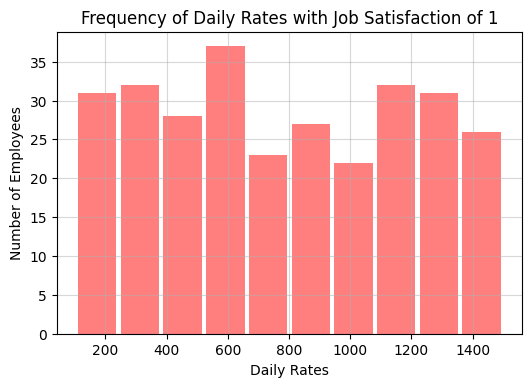

DescribeResult(nobs=289, minmax=(104, 1499), mean=782.5051903114187, variance=164628.4244521338, skewness=0.047076566688888453, kurtosis=-1.2336659128462615)


'\nThe high kurotsis indicates a more positive skew on the graph.\nThe 0.04 skew value indicates a fairly symmetrical skew, which \nmakes sense because it is a normally distributed graph.\n'

In [23]:
"""
I used histograms to see the normal distribution charts more easily
and created separate graphs for each job satisfaction level.  This will
allow us to see the ranges of Daily Rate and how many employees fall within
the range  
"""

fig, axe = plt.subplots(dpi=100)

plt.hist(SatOne['DailyRate'], alpha = .5, color = "red", bins=10, rwidth=0.9)

plt.title('Frequency of Daily Rates with Job Satisfaction of 1')
plt.xlabel('Daily Rates')
plt.ylabel('Number of Employees')
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)

plt.show()
"""
This particular plot is normally distributed.  Most employees with Job Rating of 1 seem to make 
around 600 as a daily rate.  Less people make high amount.

This is normally distributed, so from this we can interpret that people that make less  
are less satisfied, which leads to more turnover. 
"""

# Describes the results of the dataset, include mean, variance, skewness, kurtosis.
print(stats.describe(SatOne['DailyRate']))

"""
The high kurotsis indicates a more positive skew on the graph.
The 0.04 skew value indicates a fairly symmetrical skew, which 
makes sense because it is a normally distributed graph.
"""

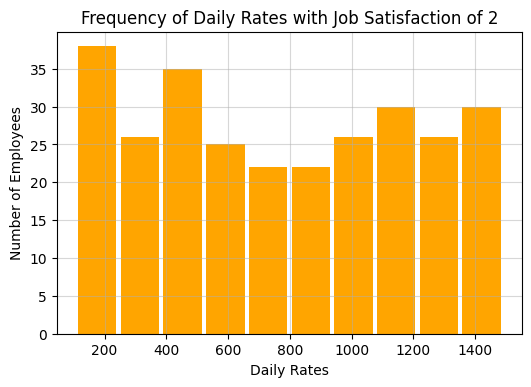

DescribeResult(nobs=280, minmax=(107, 1490), mean=771.675, variance=179728.00510752687, skewness=0.08081601136121754, kurtosis=-1.293838702559803)


In [24]:
fig, axe = plt.subplots(dpi=100)
"""
The results for a Job Satisfaction rating of 2 are fairly similar to 1.  People 
that make less Daily Rate tend to have a lower rating.  This data much like the previous
is positvely skewed with a high kurotossi rating.  the 0.08 skewness tells us that the skew is symmetrical
The results are a normal distribution. 
"""

plt.hist(SatTwo['DailyRate'], color="orange", bins=10, rwidth=0.9)
plt.title('Frequency of Daily Rates with Job Satisfaction of 2')
plt.xlabel('Daily Rates')
plt.ylabel('Number of Employees')
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)
plt.show()
print(stats.describe(SatTwo['DailyRate']))



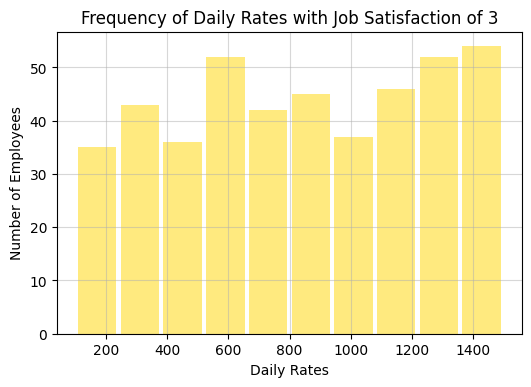

DescribeResult(nobs=442, minmax=(103, 1496), mean=835.5, variance=161883.18480725624, skewness=-0.05552305862194801, kurtosis=-1.2102609473681527)


In [25]:
fig, axe = plt.subplots(dpi=100)
"""
The data for this finally presents more variation in results.  It seems that
more people with a Job Satisfaction Rating of 3 tend to have higher salaries,
with the most being 1400.  

At around 600, where about 50 employees make, they 
have high satisfaction.  Lesss people make the middle rate, and the more people
that make the high rates have a higher satisfaction 
"""
plt.hist(SatThree['DailyRate'], alpha = .5, color="gold", bins=10, rwidth=0.9)
plt.title('Frequency of Daily Rates with Job Satisfaction of 3')
plt.xlabel('Daily Rates')
plt.ylabel('Number of Employees')
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)
plt.show()

"""
This time, the mean increased by about 100, the skewness changed to -0.05, which 
indicates a symmetical graph, with a positive skew with a high kurotsis rating.

Just examaing from this, more people that make more daily have a higher rating.  
"""

print(stats.describe(SatThree['DailyRate']))


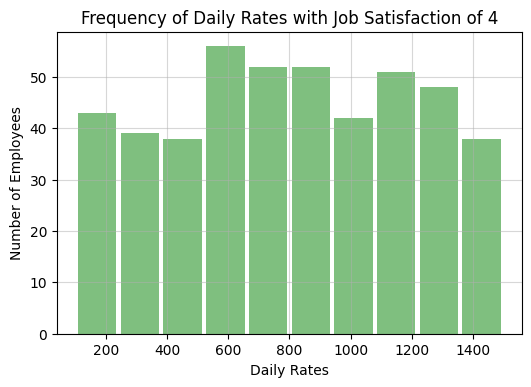

DescribeResult(nobs=459, minmax=(102, 1498), mean=802.0697167755991, variance=151465.9077927144, skewness=-0.032545552421272064, kurtosis=-1.1086527425326018)


In [26]:
""" 
Results for Job Satisfaction Rating of 4 are quite similar to 3, but less people 
make the 1400, but overall, graph is normally distributed with a skewness of -0.03,
which means it is positvely skewed with high kurtosis
"""
fig, axe = plt.subplots(dpi=100)
plt.hist(SatFour['DailyRate'], alpha = .5, color="green", bins=10, rwidth=0.9)
plt.title('Frequency of Daily Rates with Job Satisfaction of 4')
plt.xlabel('Daily Rates')
plt.ylabel('Number of Employees')
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)
plt.show()

# Similar results to previous set.
print(stats.describe(SatFour['DailyRate']))


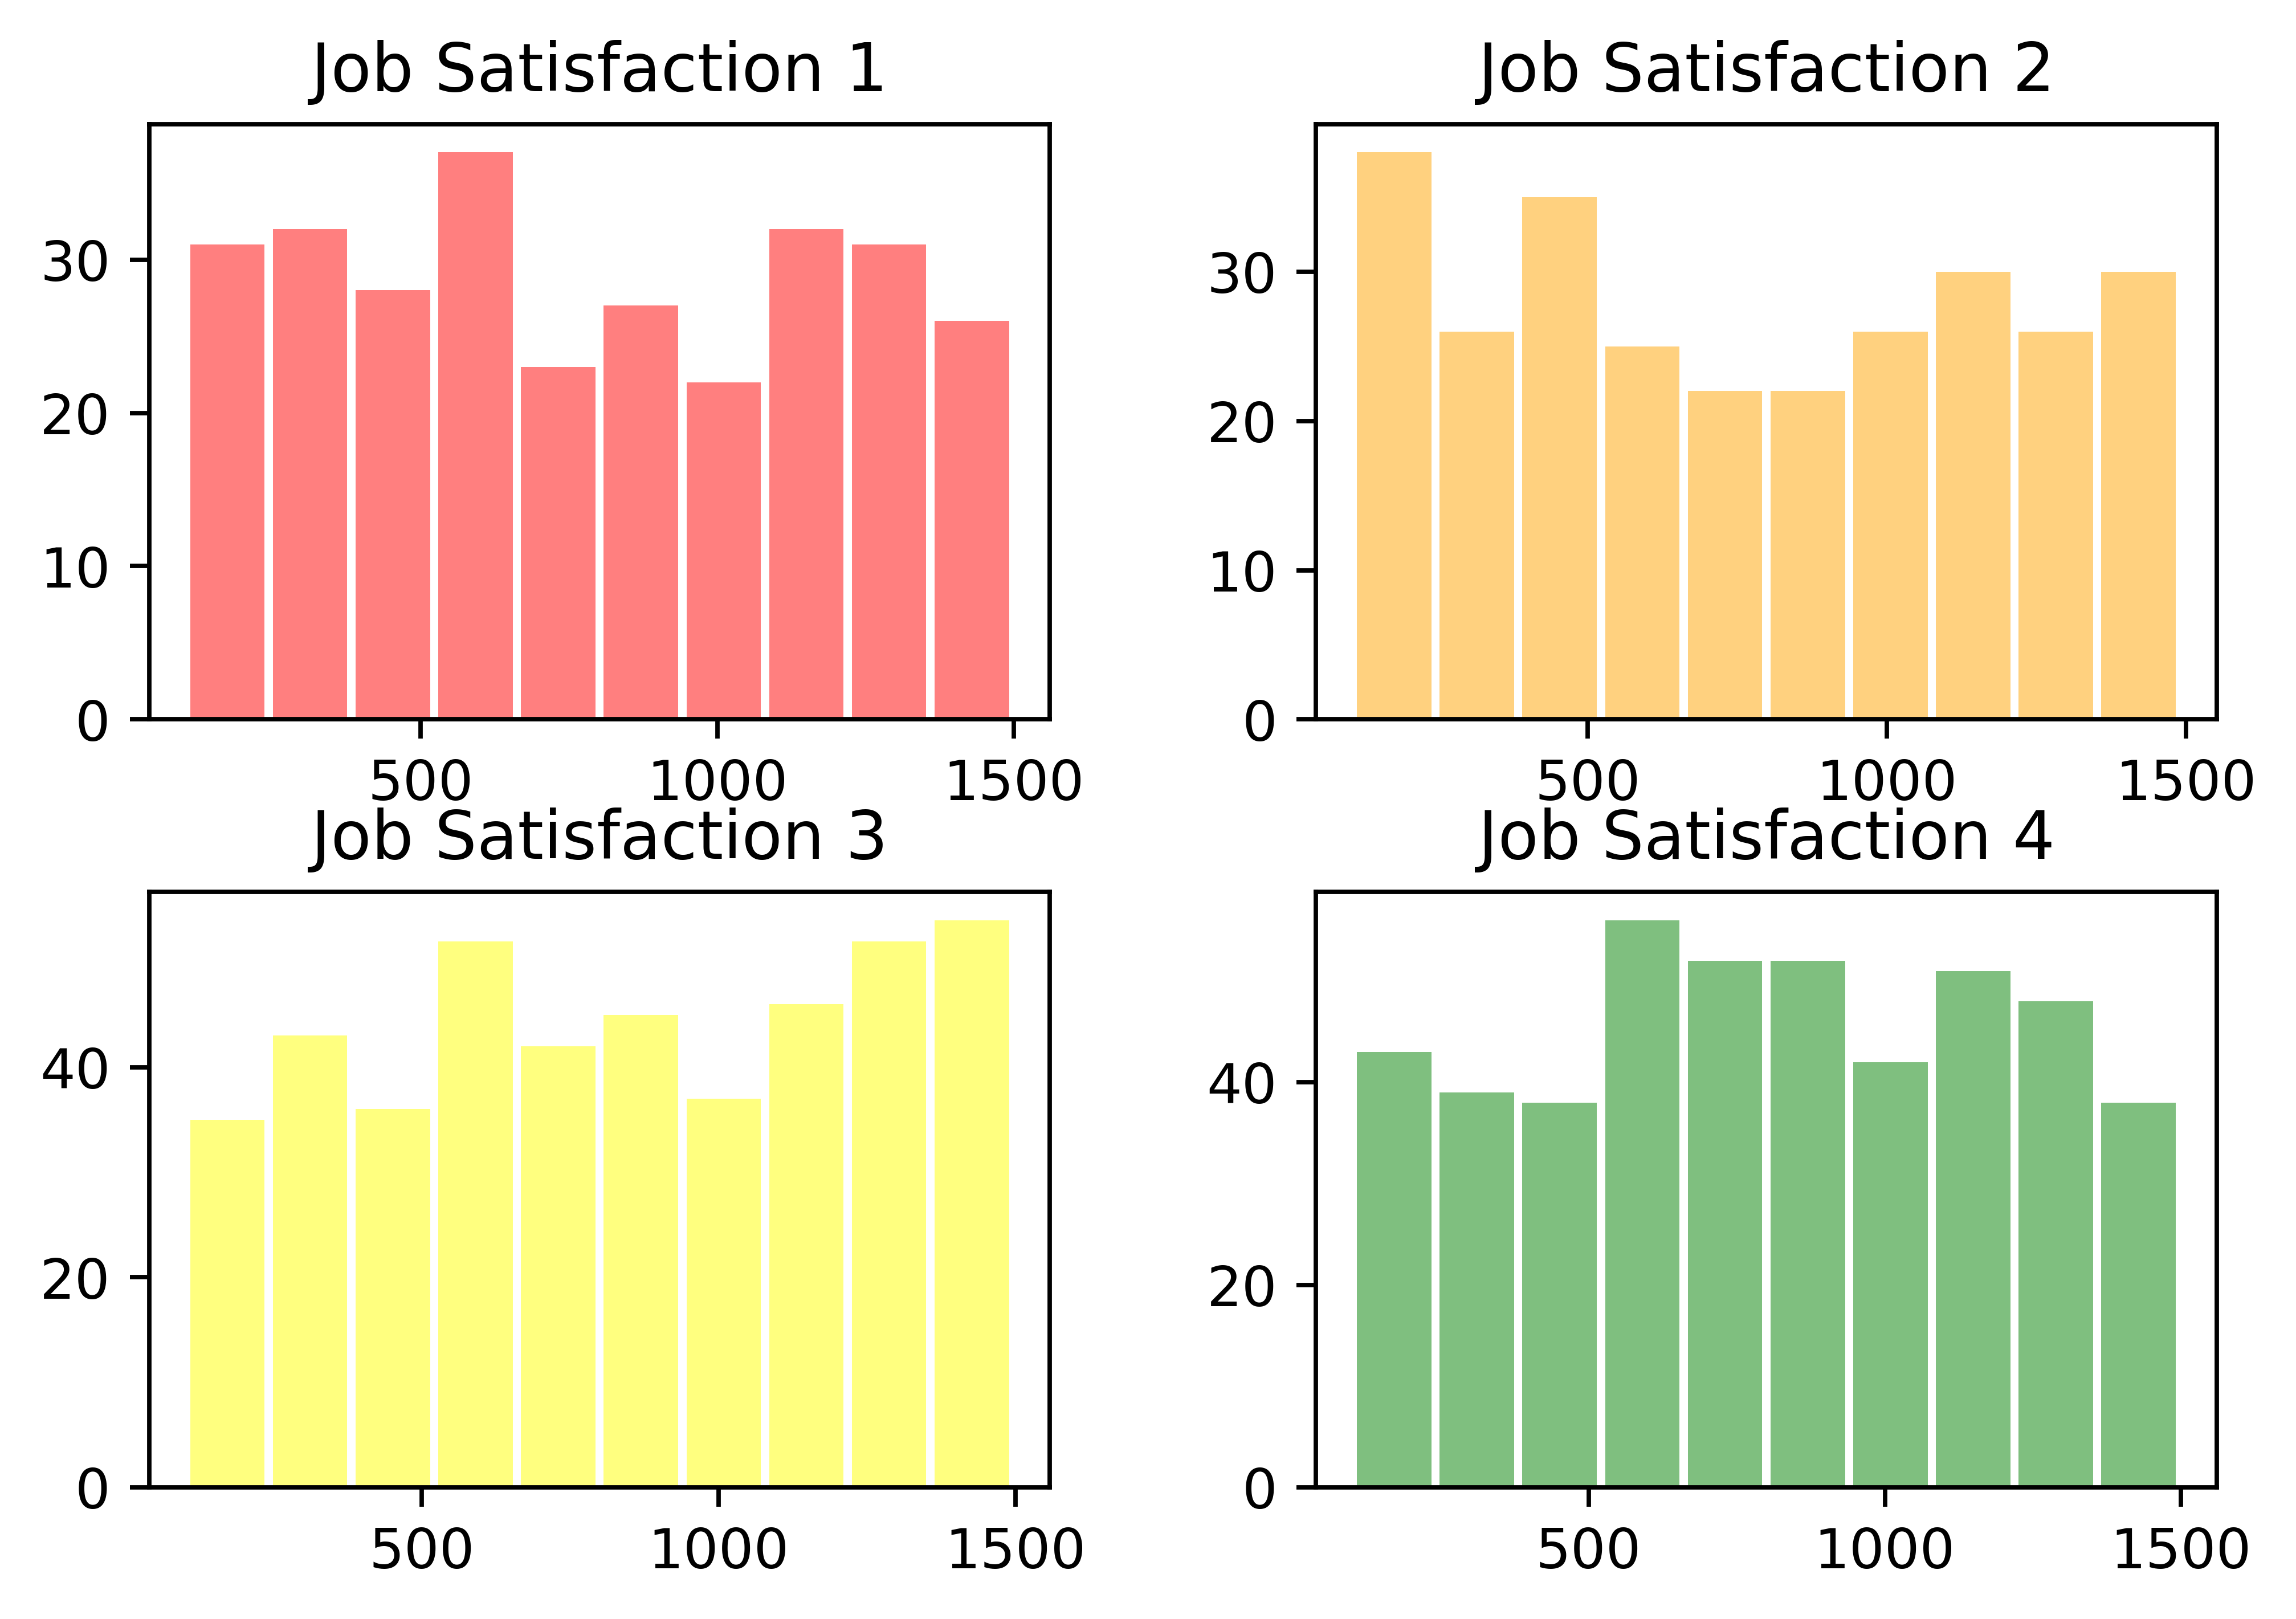

In [27]:
# Lets now show all four graphs at once, to make it easier to see visually.

fig, axe = plt.subplots(nrows=2, ncols=2, dpi=700)
plt.tight_layout()
axe[0][0].hist(SatOne['DailyRate'], color = "red", bins=10, rwidth=0.9, alpha = .5)
axe[0][0].set_title("Job Satisfaction 1")
axe[0][1].hist(SatTwo['DailyRate'], color="orange", bins=10, rwidth=0.9, alpha = .5)
axe[0][1].set_title("Job Satisfaction 2")
axe[1][0].hist(SatThree['DailyRate'], color="yellow", bins=10, rwidth=0.9, alpha = .5)
axe[1][0].set_title("Job Satisfaction 3")
axe[1][1].hist(SatFour['DailyRate'], color ="green", bins=10, rwidth=0.9, alpha = .5)
axe[1][1].set_title("Job Satisfaction 4")

plt.show()



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


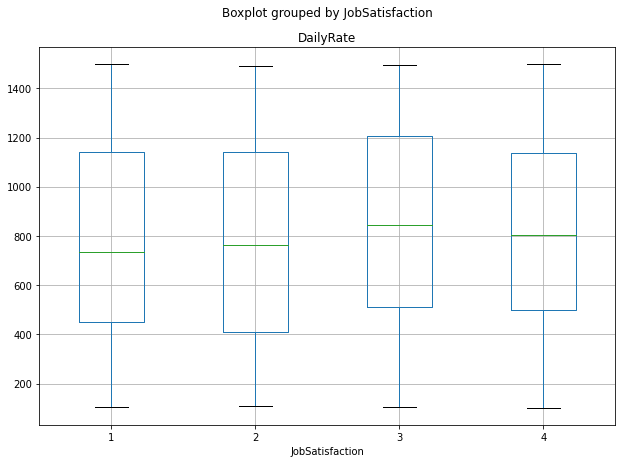

In [28]:
# Box Plot
"""
As we can see from the box plot, the median is fairly consistent throughout the job ratings.
The median lying between 700-850 is the range of Daily Rates majority of employees make.

Noticably, the higher Job Satisfaction have a higher median.  

Relates back to the normally distributed graphs, more people have a higher job satisfaction
if they make more.  

The Y Axis indicates daily rate while the X axis is the Job Satisfaction Level
"""
attritionDF.boxplot('DailyRate', by='JobSatisfaction', figsize=(10, 7), )



In [29]:
"""
Because we are comparing multiple groups, it's better to use a One Way Anova Test
This allows us to see if there's any major variation between the groups, in this case,
the level of Job Satisfaction.

We can compare the p-value against our desired alpha (usually .05) to determine statistical significance.  
It appears that the four levels of job satisfacito are likely to not vary too much in the ranges of Daily Rates.
Our P value is > 0.05, with it being 0.15, therefore no major difference.  

"""
stats.f_oneway(SatFour['DailyRate'], SatThree['DailyRate'], SatTwo['DailyRate'], SatOne['DailyRate'])

F_onewayResult(statistic=1.7695855893681165, pvalue=0.15103920004212745)

In [30]:
# one way anova
# Here is all of the T-Tests done to compared the individual groups

"""Out of all of them, only a Job Satisfaction comparison between 2 and 3 seem to indicate any high significant.  
# due to having a P value < 0.05.  The rest have quite high and do not indicate much significance.
"""
print(stats.ttest_ind((SatOne['DailyRate']), SatTwo['DailyRate']))
print(stats.ttest_ind((SatOne['DailyRate']), SatThree['DailyRate']))
print(stats.ttest_ind((SatOne['DailyRate']), SatFour['DailyRate']))
print(stats.ttest_ind((SatTwo['DailyRate']), SatThree['DailyRate']))
print(stats.ttest_ind((SatTwo['DailyRate']), SatFour['DailyRate']))
print(stats.ttest_ind((SatThree['DailyRate']), SatFour['DailyRate']))

Ttest_indResult(statistic=0.31136513524632103, pvalue=0.7556375007328802)
Ttest_indResult(statistic=-1.7353373106156962, pvalue=0.08310366522363867)
Ttest_indResult(statistic=-0.6584925333715044, pvalue=0.5104248637298046)
Ttest_indResult(statistic=-2.0338956102453998, pvalue=0.042328237622612334)
Ttest_indResult(statistic=-0.9953661541670068, pvalue=0.3198848967070223)
Ttest_indResult(statistic=1.267746643933126, pvalue=0.2052166885360711)


In [31]:
# We use Kruskal's Test here to compare multiple groups.  

"""
The Kruskal-Wallis test is used for two or more groups.  While this test is a bit complicated, the underlying logic 
is the same as the one-way ANOVA we covered earlier.  

First, we compute an estimate of the size of the differences between the groups, then we put that difference into 
context by dividing it by the amount of variance in the groups
"""
stats.kruskal(SatFour['DailyRate'], SatThree['DailyRate'], SatTwo['DailyRate'], SatOne['DailyRate'])

# The results indicate a high statistics and a p-value of 0.14, therefore it indicates there is an overall no significant change between the job satisfaction levels.  

KruskalResult(statistic=5.328533193711501, pvalue=0.1492615938487421)